🌟 Exercise 1 : Visualizing the Distribution of CGPA

In [166]:
import pandas as pd

df = pd.read_csv('Student Mental health.csv')
print(df.head(10))
print(df.info())
print(df.describe())

        Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   
5  8/7/2020 12:31               Male  19.0          Engineering   
6  8/7/2020 12:32             Female  23.0     Pendidikan islam   
7  8/7/2020 12:33             Female  18.0                  BCS   
8  8/7/2020 12:35             Female  19.0      Human Resources   
9  8/7/2020 12:39               Male  18.0                Irkhs   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No  

In [167]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     100 non-null    object 
 1   Choose your gender                            100 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          100 non-null    object 
 4   Your current year of Study                    100 non-null    object 
 5   What is your CGPA?                            100 non-null    object 
 6   Marital status                                100 non-null    object 
 7   Do you have Depression?                       100 non-null    object 
 8   Do you have Anxiety?                          100 non-null    object 
 9   Do you have Panic attack?                     100 non-null    object 


In [168]:
import seaborn as sns
import matplotlib.pyplot as plt


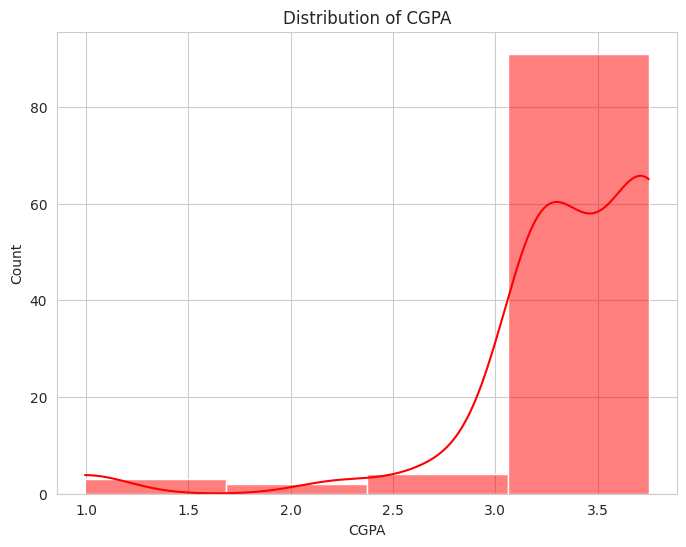

In [169]:
def extract_mean_interval(interval):
    start, end = map(float, interval.split(' - '))
    return (start + end) / 2

df['CGPA_numeric'] = df['What is your CGPA?'].apply(extract_mean_interval)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='CGPA_numeric', bins=4, kde=True, color='red')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.title('Distribution of CGPA')
plt.show()

🌟 Exercise 2: Comparing Anxiety Levels Across Different Genders

In [170]:
anxiety_lvl_by_gender = df.groupby('Choose your gender')['Do you have Anxiety?'].count()

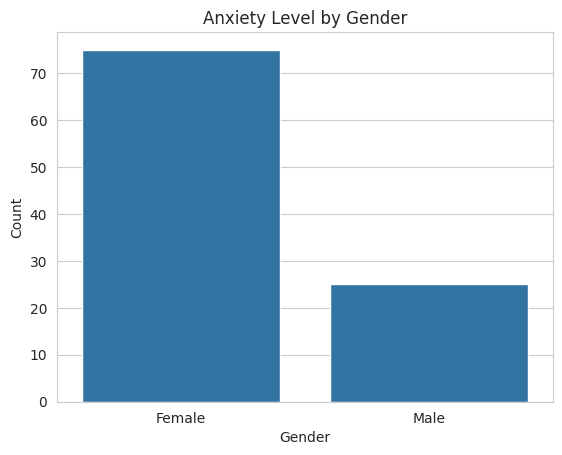

In [171]:
sns.barplot(x=anxiety_lvl_by_gender.index, y=anxiety_lvl_by_gender.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Anxiety Level by Gender')
plt.show()


🌟 Exercise 3: Exploring the Relationship Between Age and Panic Attacks

In [172]:
df['Do you have Panic attack?'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})
df['Do you have Panic attack?'].unique()
df.head(10)




,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,CGPA_numeric
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,1,No,3.245
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,0,No,3.245
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,1,No,3.245
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,0,No,3.245
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,0,No,3.245
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,1,No,3.750
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,1,No,3.750
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,0,No,3.750
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,0,No,2.745
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,1,No,3.750


In [173]:
panic_atack_by_age = df.groupby('Age')['Do you have Panic attack?'].sum()
panic_atack_by_age

,Do you have Panic attack?
Age,
18.0,9
19.0,9
20.0,1
21.0,0
22.0,0
23.0,5
24.0,9


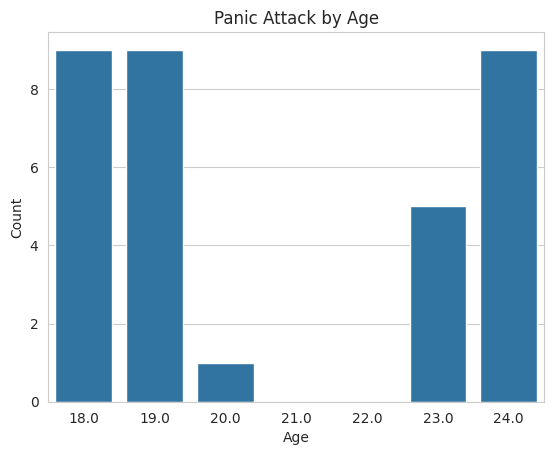

In [174]:
sns.barplot(x=panic_atack_by_age.index, y=panic_atack_by_age.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Panic Attack by Age')
plt.show()

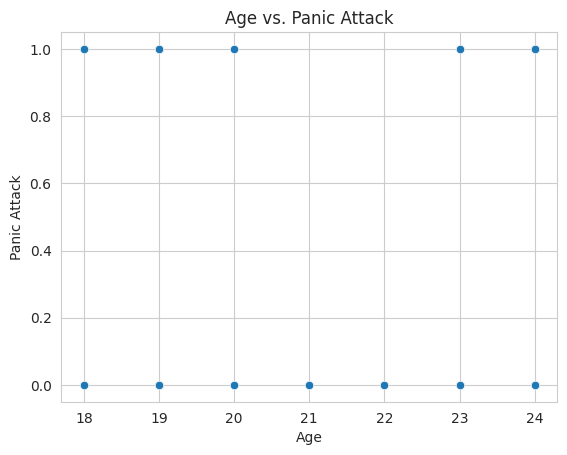

In [175]:
sns.scatterplot(data=df, x='Age', y='Do you have Panic attack?')
plt.xlabel('Age')
plt.ylabel('Panic Attack')
plt.title('Age vs. Panic Attack')
plt.show()


🌟 Exercise 4: Visualizing Pairwise Relationships with Seaborn Pair Plot

In [176]:
df['Do you have Anxiety?'] = df['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
df['Do you have Depression?'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     100 non-null    object 
 1   Choose your gender                            100 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          100 non-null    object 
 4   Your current year of Study                    100 non-null    object 
 5   What is your CGPA?                            100 non-null    object 
 6   Marital status                                100 non-null    object 
 7   Do you have Depression?                       100 non-null    int64  
 8   Do you have Anxiety?                          100 non-null    int64  
 9   Do you have Panic attack?                     100 non-null    int64  


In [177]:
filtered_data = df[['Age', 'Do you have Anxiety?', 'Do you have Depression?', 'Do you have Panic attack?']]
filtered_data.head(10)

,Age,Do you have Anxiety?,Do you have Depression?,Do you have Panic attack?
0,18.0,0,1,1
1,21.0,1,0,0
2,19.0,1,1,1
3,22.0,0,1,0
4,23.0,0,0,0
5,19.0,0,0,1
6,23.0,0,1,1
7,18.0,1,0,0
8,19.0,0,0,0
9,18.0,1,0,1


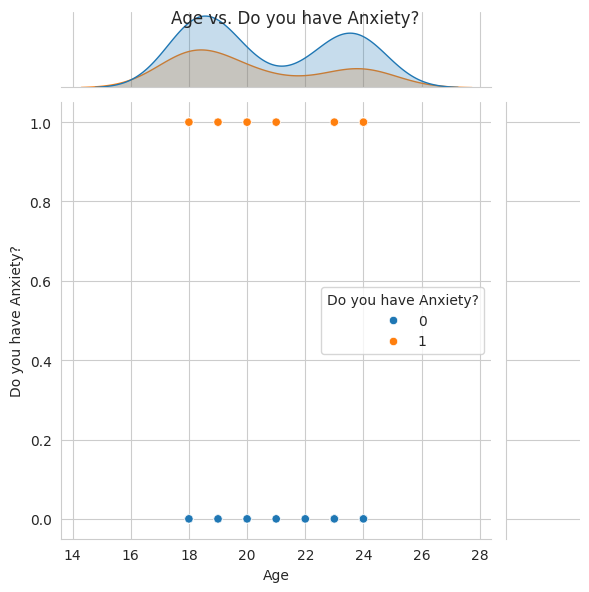

In [194]:
sns.jointplot(data=filtered_data, x='Age', y='Do you have Anxiety?', hue='Do you have Anxiety?')
plt.xlabel('Age')
plt.ylabel('Do you have Anxiety?')
plt.suptitle('Age vs. Do you have Anxiety?')
plt.show()

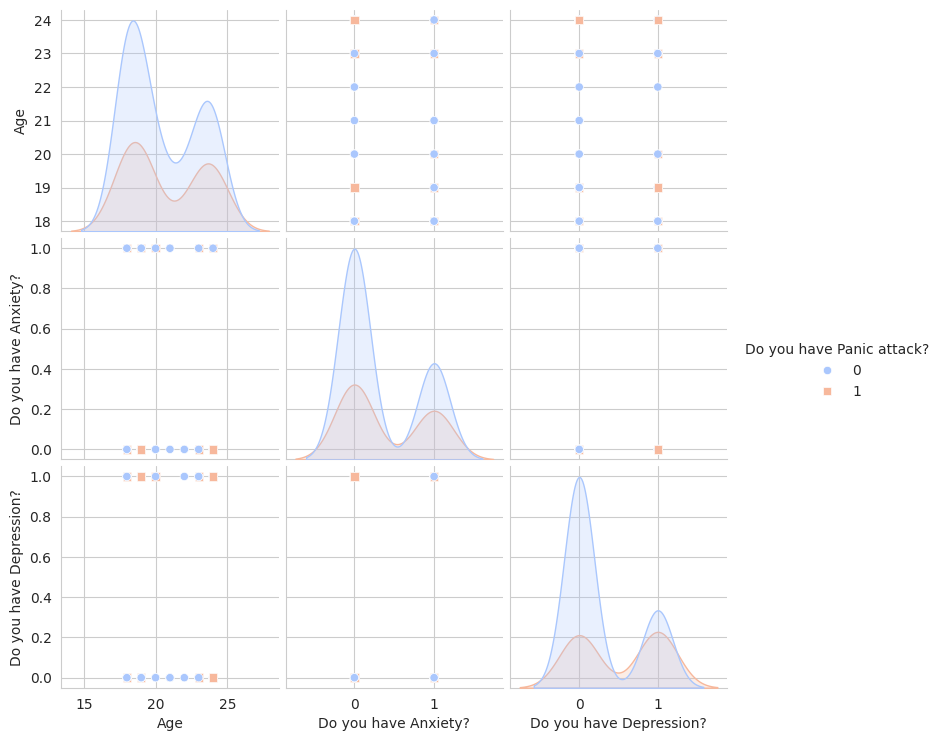

In [183]:
sns.pairplot(filtered_data, hue='Do you have Panic attack?', palette='coolwarm', markers=["o", "s"])
plt.show()


🌟 Exercise 5: Creating a Heatmap to Visualize Correlations

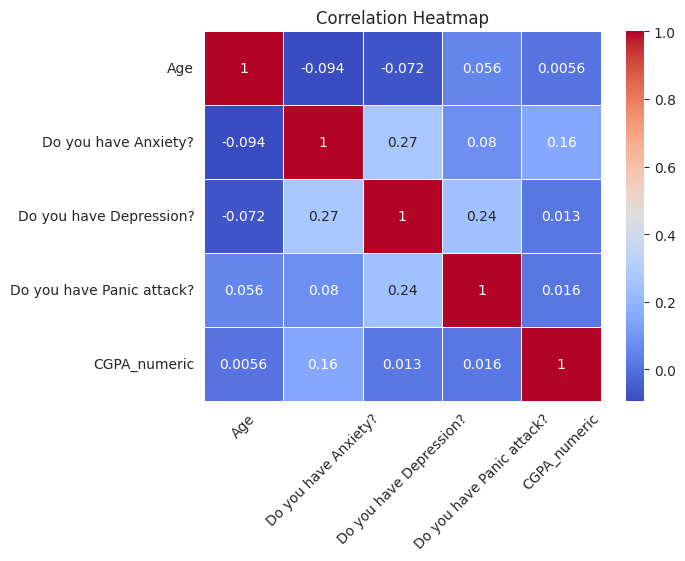

In [207]:
filtered_data = df[['Age', 'Do you have Anxiety?', 'Do you have Depression?', 'Do you have Panic attack?', 'CGPA_numeric']]
corr_matrix = filtered_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)

plt.show()

🌟 Exercise 6: Analyzing Distributions and Relationships Using FacetGrid

In [214]:
depressed_data = df[['Do you have Depression?','CGPA_numeric']]
depressed_data.head()

,Do you have Depression?,CGPA_numeric
0,1,3.245
1,0,3.245
2,1,3.245
3,1,3.245
4,0,3.245


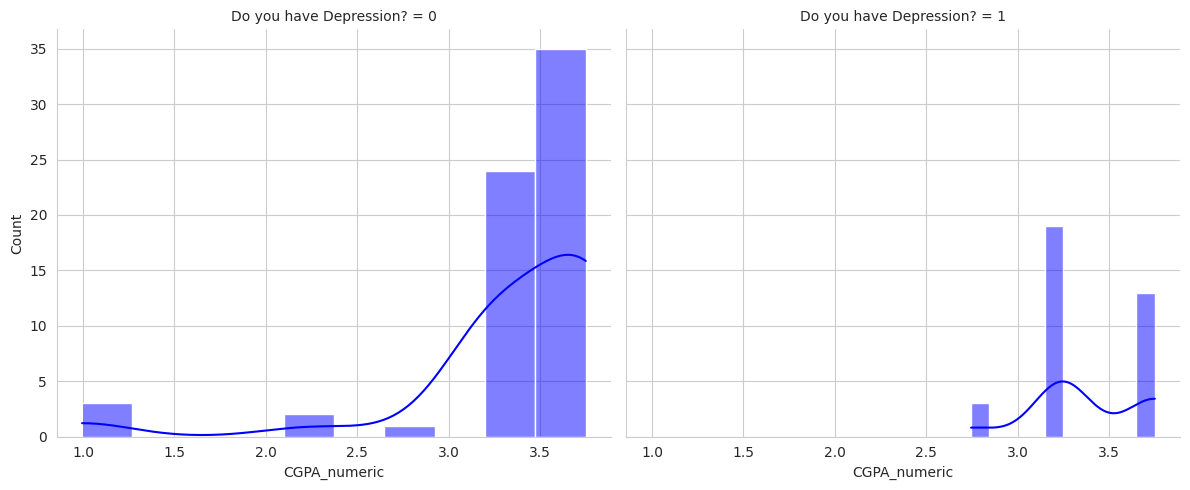

In [219]:
g = sns.FacetGrid(depressed_data, col='Do you have Depression?', height=5, aspect=1.2)
g.map(sns.histplot, 'CGPA_numeric', bins=10, kde=True, color='blue')